Implement a KNN model to classify the animals in to categorie

In [10]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
df1=df.drop(['animal name'],axis=1)
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [13]:
df1.shape

(101, 17)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [15]:
df1['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [16]:
df1.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [17]:
df1.duplicated().shape

(101,)

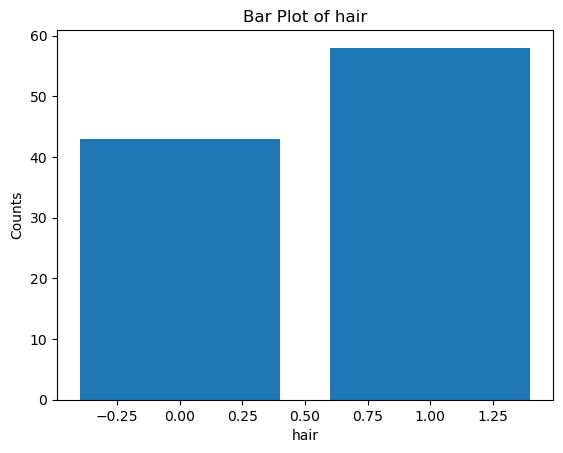

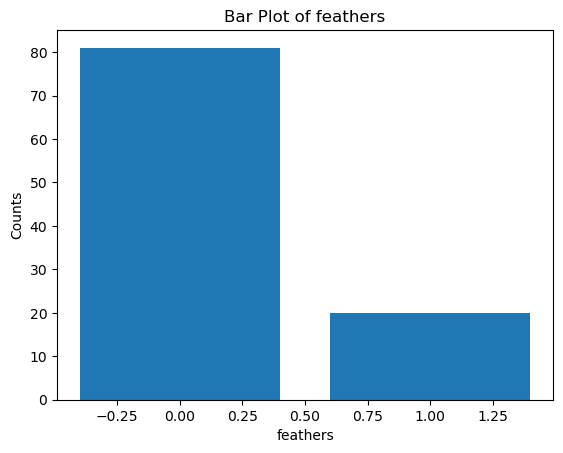

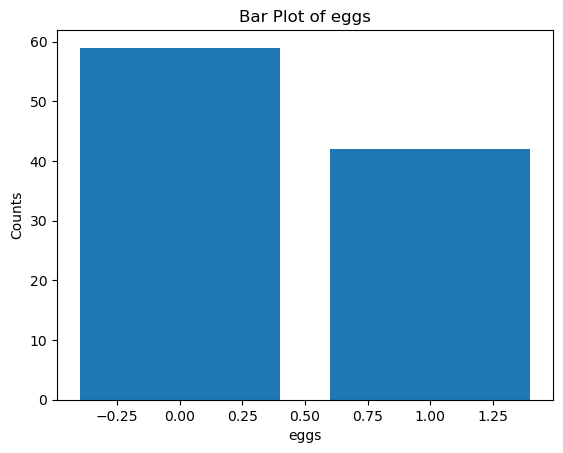

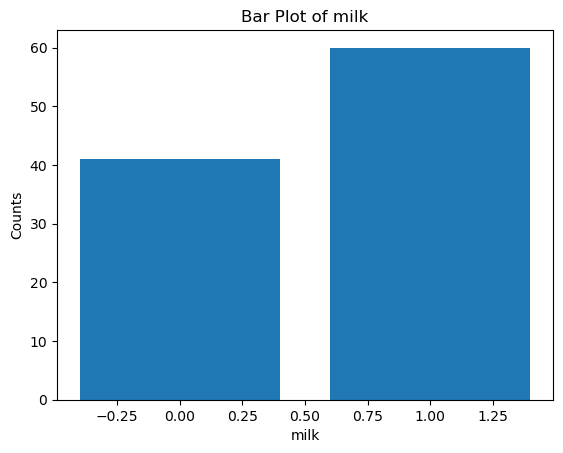

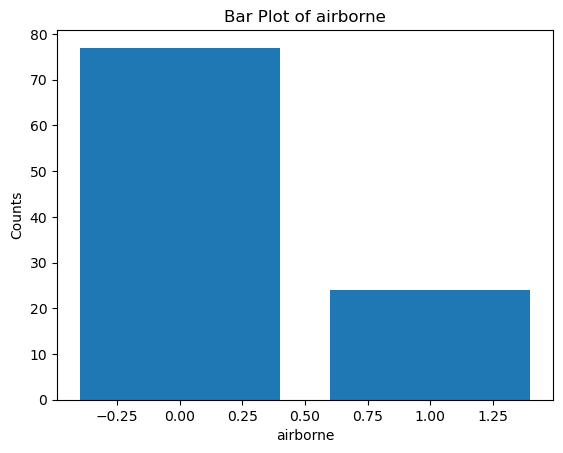

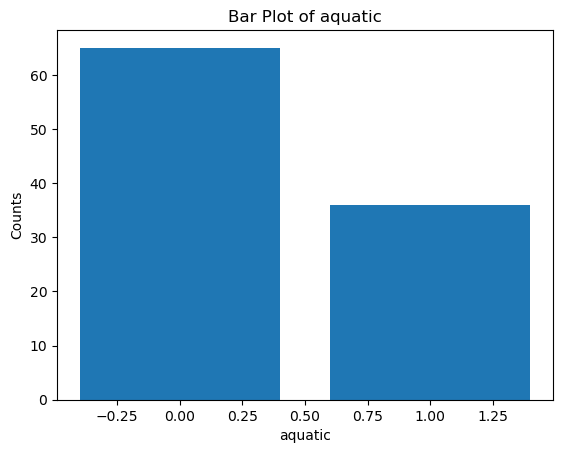

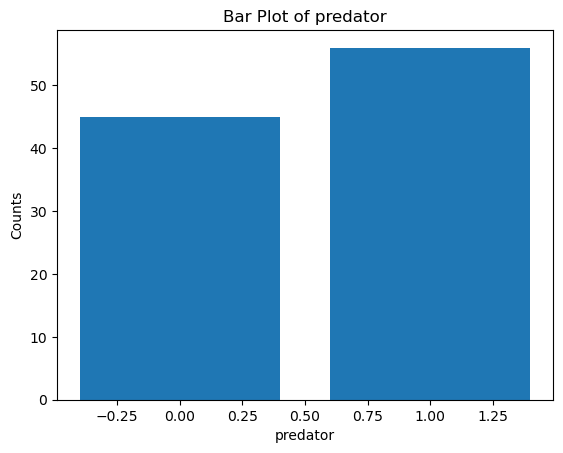

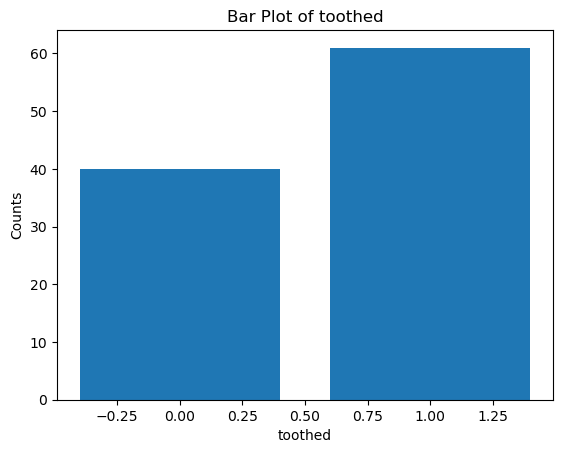

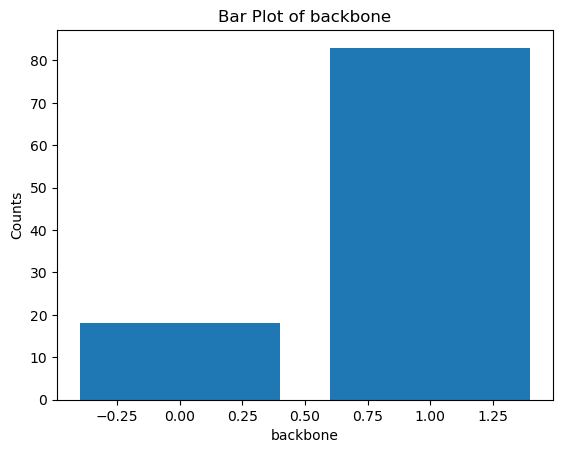

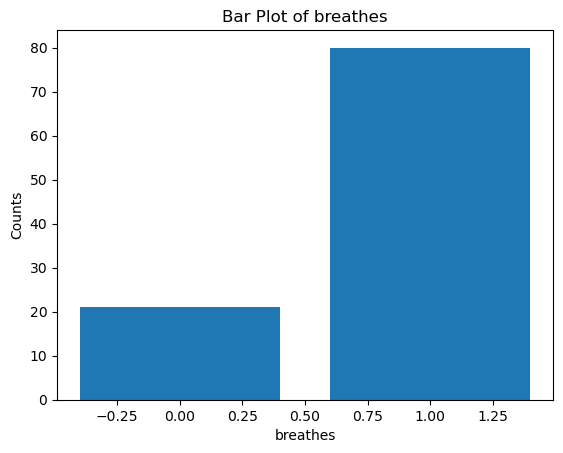

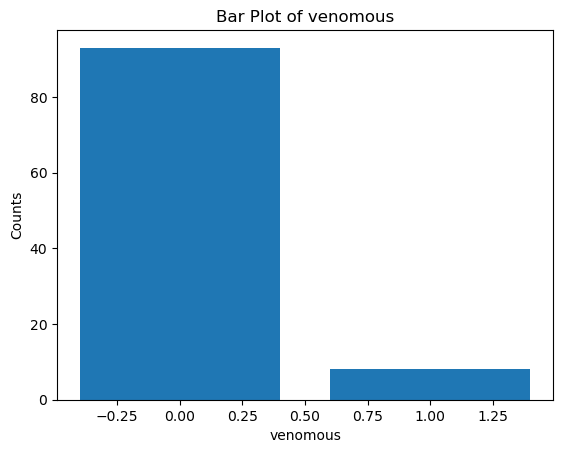

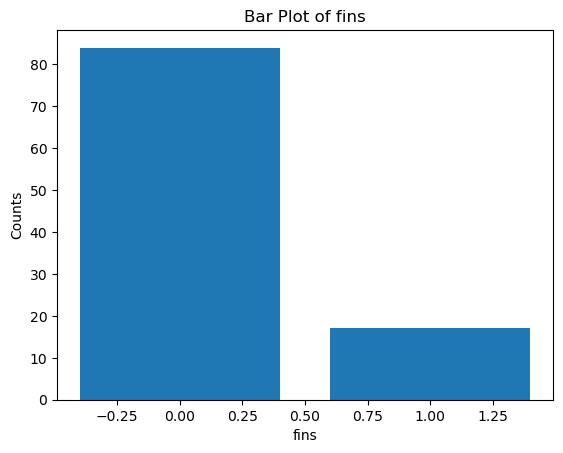

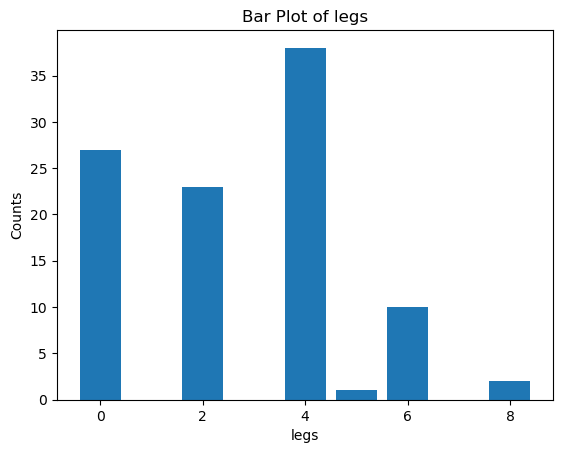

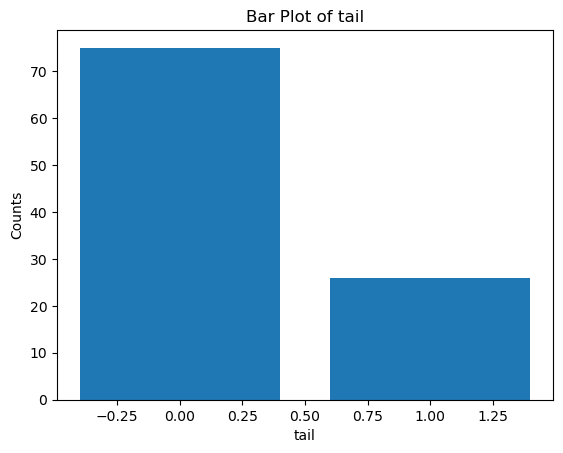

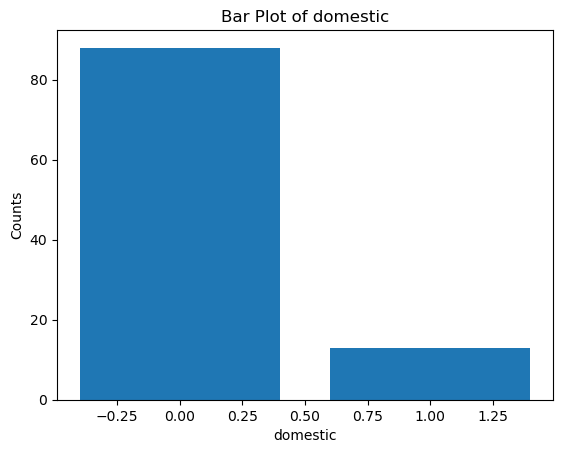

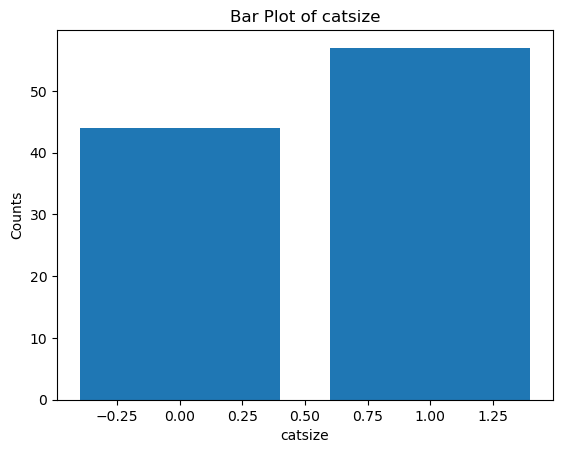

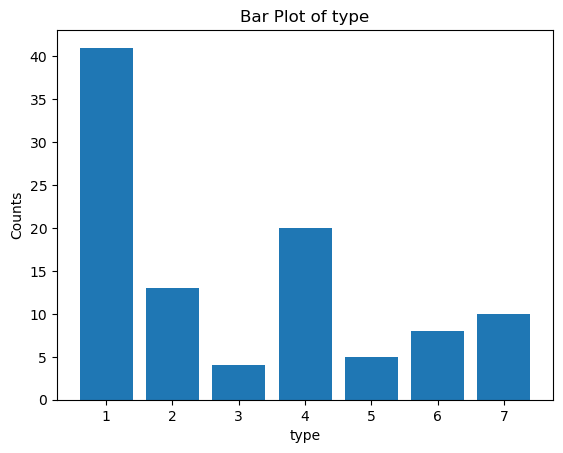

In [18]:

# Loop through each column in the DataFrame
for column in df1.columns:
    if df1[column].dtype == 'int64' or df1[column].dtype == 'float64':
        # Get the unique values in the column
        a = df1[column].unique()
        
        # Count the number of occurrences of each unique value in the column
        counts = df1[column].value_counts()
        
        # Plot the bar plot
        plt.bar(a, counts)
        
        # Add labels and a title to the plot
        plt.xlabel(column)
        plt.ylabel('Counts')
        plt.title('Bar Plot of ' + column)
        
        # Show the plot
        plt.show()

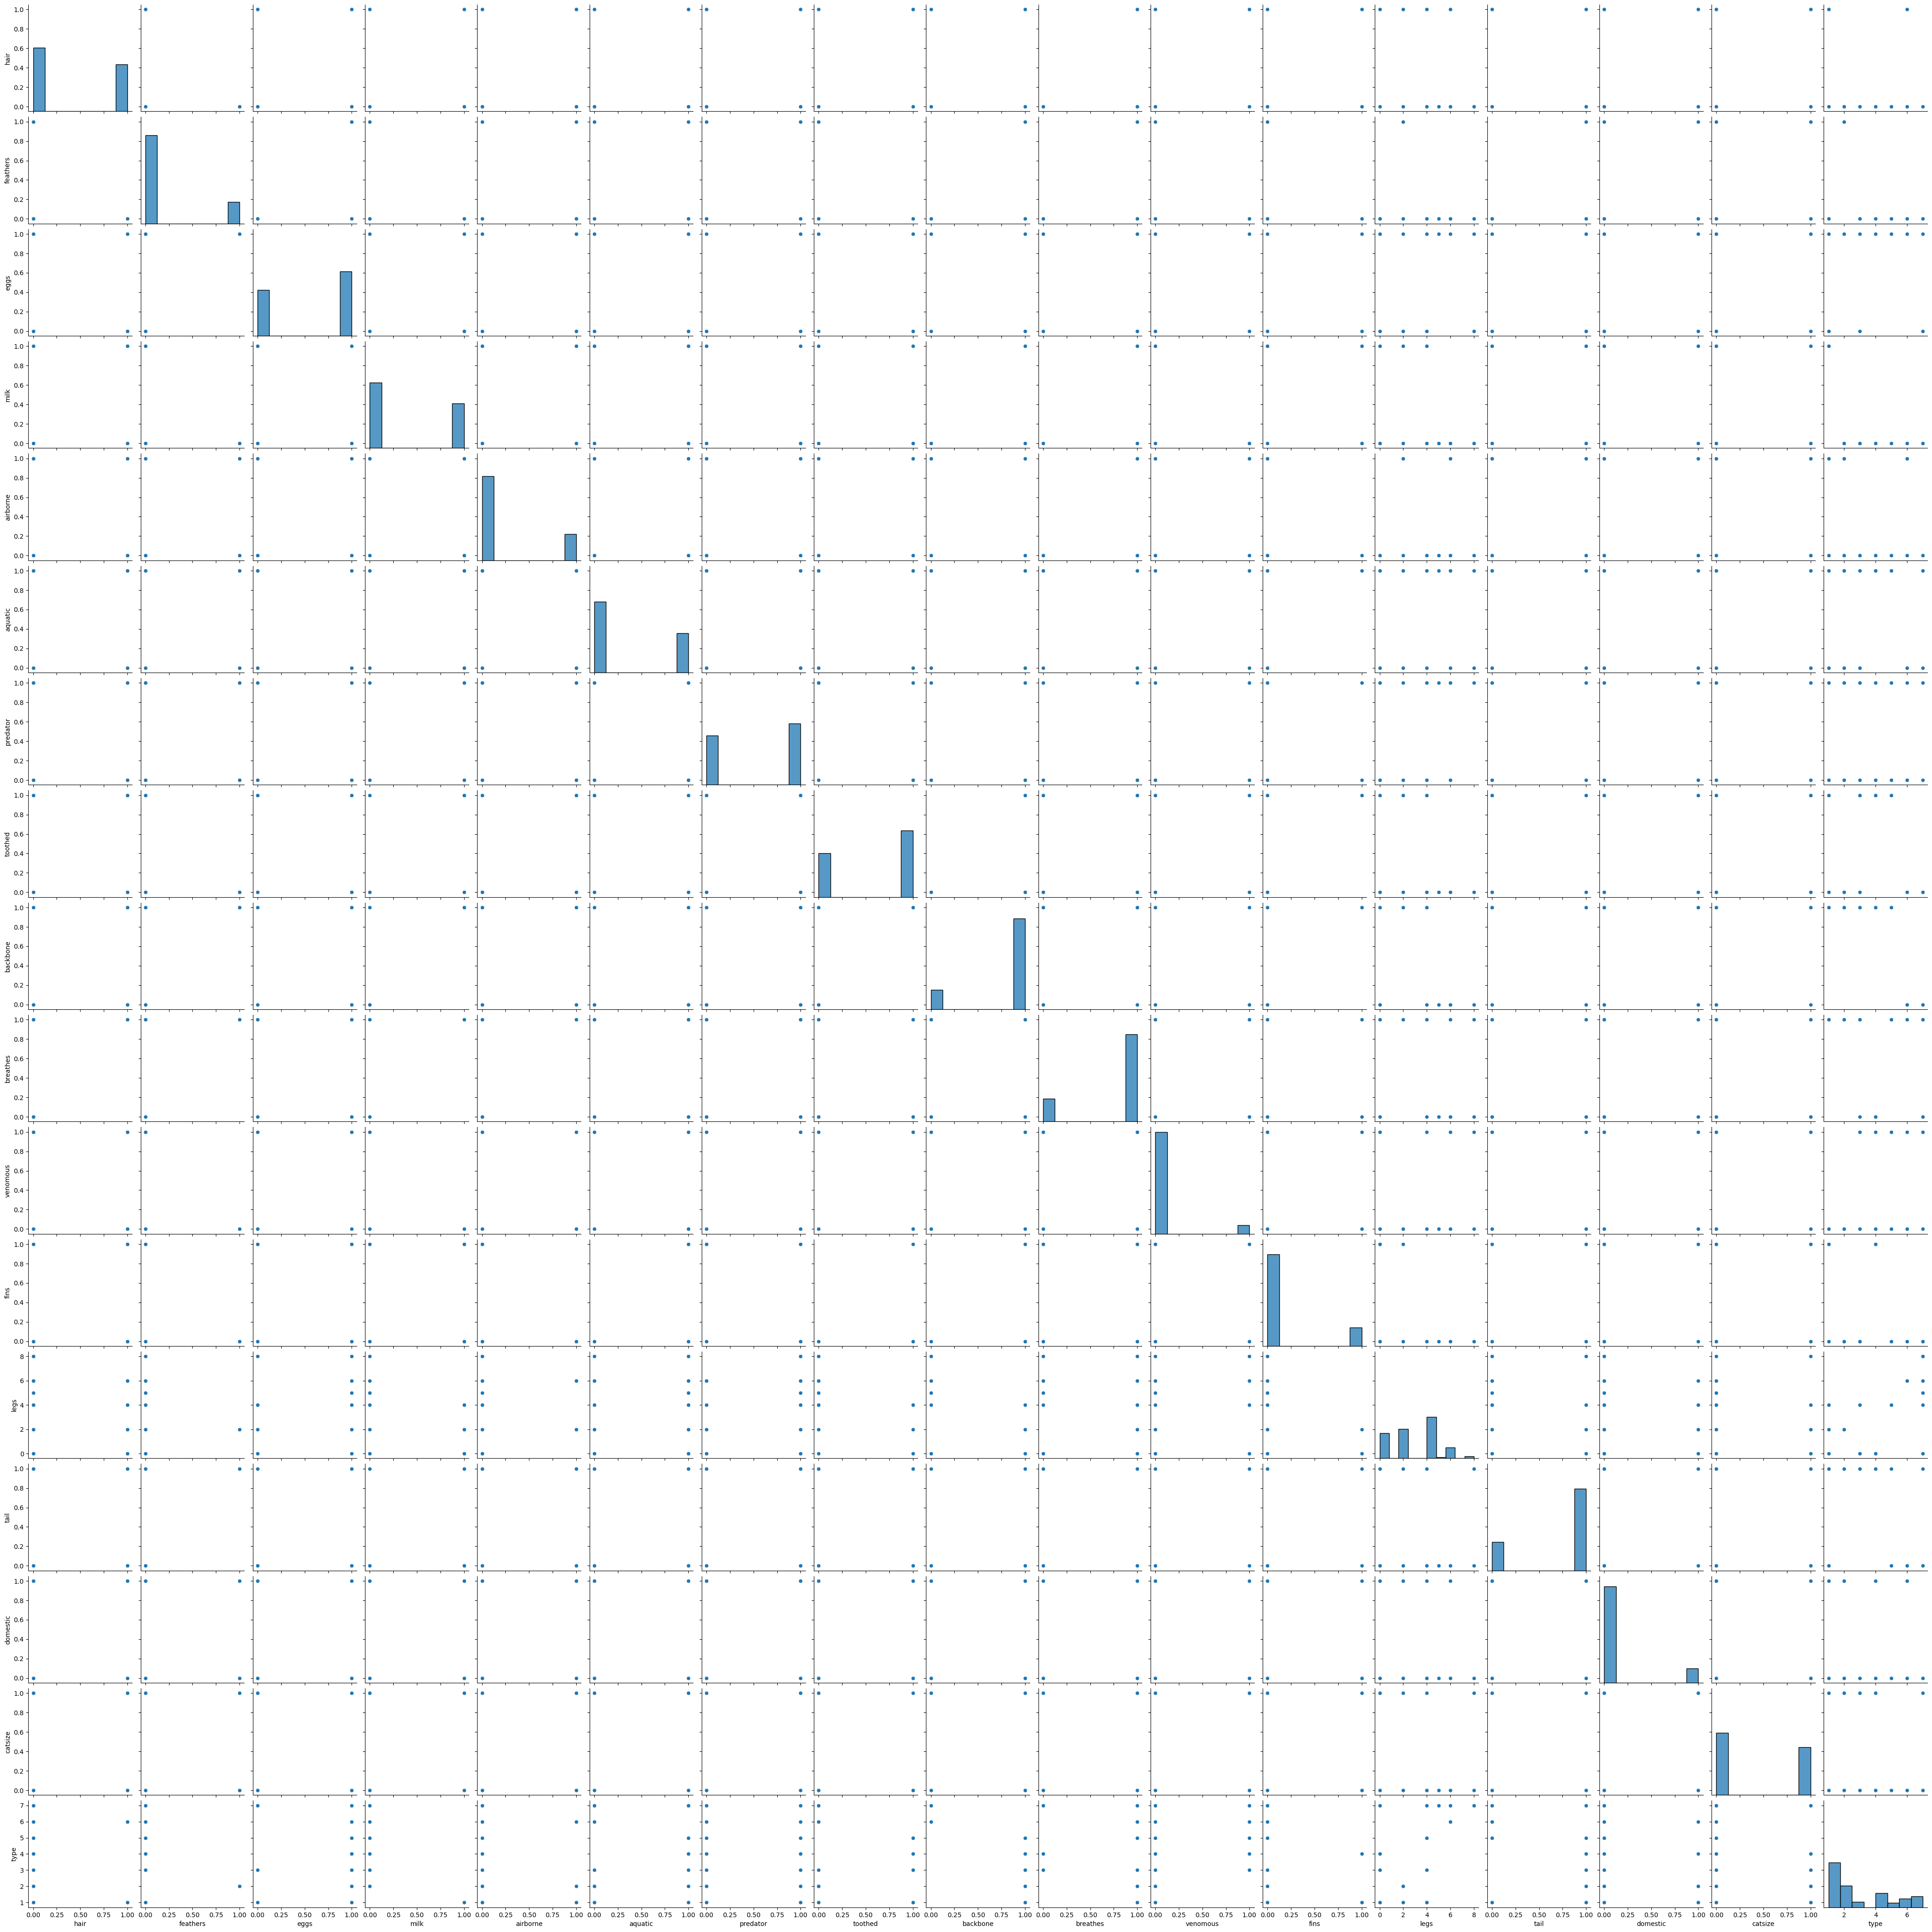

In [19]:
import seaborn as sns
sns.pairplot(df1)

In [20]:
X=df1.iloc[:,0:-1]
Y=df1.iloc[:,-1]
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [21]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=19)

In [23]:
import warnings
warnings.filterwarnings('ignore')
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           6       0.33      1.00      0.50         1
           7       1.00      0.67      0.80         6

    accuracy                           0.87        31
   macro avg       0.84      0.86      0.80        31
weighted avg       0.92      0.87      0.87        31



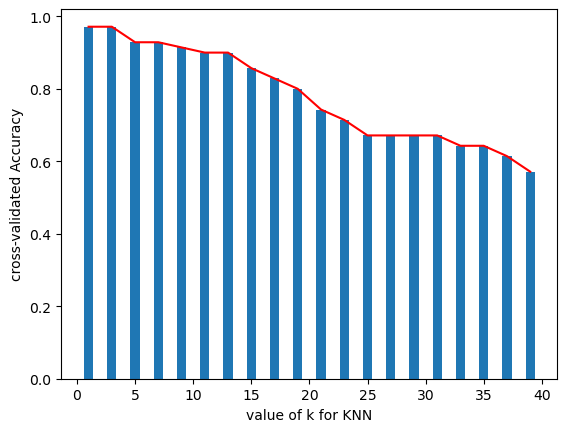

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range=[2*i+1 for i in range(0,20)]
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10)
    k_scores.append(scores.mean())    
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color='red')
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.show()


In [25]:
np.argmax(k_scores)

0

In [26]:
k_range[0]

1

In [27]:
k_scores[0]

0.9714285714285715

In [28]:
import warnings
warnings.filterwarnings('ignore')
model1=KNeighborsClassifier(n_neighbors=1)
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           6       0.33      1.00      0.50         1
           7       1.00      0.67      0.80         6

    accuracy                           0.87        31
   macro avg       0.84      0.86      0.80        31
weighted avg       0.92      0.87      0.87        31



In [29]:
ypreds_train= model1.predict(x_train)
ypreds_train

array([1, 2, 2, 2, 4, 1, 4, 6, 1, 1, 1, 2, 5, 6, 2, 6, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 7, 1, 6, 5, 5, 6, 1, 2, 1, 1, 4, 1, 1, 1, 1, 4, 1, 2, 1,
       7, 2, 1, 4, 1, 1, 2, 7, 3, 7, 6, 1, 4, 1, 1, 4, 1, 2, 1, 1, 1, 5,
       1, 6, 1, 1], dtype=int64)

In [30]:
yactual_train=y_train
yactual_train

63    1
87    2
33    2
43    2
92    4
     ..
52    5
19    1
40    6
98    1
93    1
Name: type, Length: 70, dtype: int64

In [31]:
import warnings
warnings.filterwarnings('ignore')
model2=KNeighborsClassifier(n_neighbors=1)
model2.fit(x_train,y_train)
ypreds_train= model1.predict(x_train)
accuracy_score(pred,y_test)
pd.Series(ypreds_train).value_counts()
print(classification_report(y_train,ypreds_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



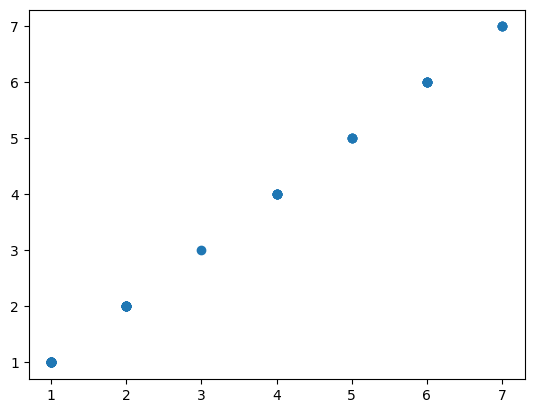

In [32]:
import matplotlib.pyplot as plt
plt.scatter(ypreds_train,yactual_train)
plt.show()

In [33]:
import warnings
warnings.filterwarnings('ignore')
model3=KNeighborsClassifier(n_neighbors=1)
model3.fit(x_train,y_train)
ypreds_test = model3.predict(x_test)
accuracy_score(pred,y_test)
pd.Series(ypreds_test).value_counts()
print(classification_report(y_test,ypreds_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           6       0.33      1.00      0.50         1
           7       1.00      0.67      0.80         6

    accuracy                           0.87        31
   macro avg       0.84      0.86      0.80        31
weighted avg       0.92      0.87      0.87        31



In [34]:
ypreds_test = model3.predict(x_test)
ypreds_test

array([2, 2, 2, 4, 4, 4, 3, 6, 1, 3, 4, 1, 2, 7, 4, 1, 1, 2, 1, 7, 6, 7,
       1, 6, 1, 4, 2, 2, 4, 1, 7], dtype=int64)

In [35]:
yactual_test=y_test
yactual_test

58    2
37    2
16    2
18    4
2     4
82    4
91    3
30    6
84    1
62    3
8     4
64    1
78    2
13    7
38    4
47    1
28    1
59    2
96    1
77    7
81    7
14    7
48    1
99    7
65    1
61    4
79    2
90    3
76    3
6     1
46    7
Name: type, dtype: int64

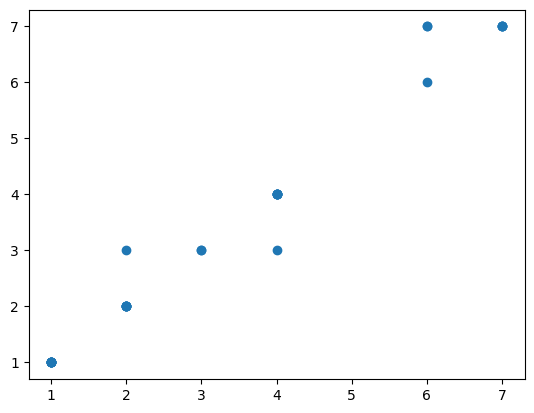

In [36]:
import matplotlib.pyplot as plt
plt.scatter(ypreds_test,yactual_test)
plt.show()